In [78]:
import pandas as pd
import pyodbc
connection_string = ("DRIVER={SQL Server};"
"SERVER=USDF11V0954;"
"DATABASE=Actuarial_AH;"
"Trust_Connection=yes;")

conn = pyodbc.connect(connection_string)
cursor = conn.cursor()

In [81]:
med = """
SELECT MEMBER_ID,
MEDICAL_CLAIM_ID,
BILLING_PROVIDER_NAME,
PAID_DATE,
MEDICAL_PAID_AMOUNT,
MEDICAL_ALLOWED_AMOUNT,
PROCEDURE_CODE,
PROCEDURE_DESC,
SERVICE_DATE,
EMPLOYER_NAME,
SERVICING_PROVIDER_STATE,
DIAGNOSIS_DESC_ICD10_1
FROM ACTUARIAL_AH.DBO.SN_Medical
-- WHERE PROCEDURE_CODE IN ('0253U', '0255U', '52402', '54500', '54505', '55300', '55530', '55535', '55550', '55870', '58140', '58145', '58146', '58321', '58322', '58323', '58340', '58345', '58350', '58545', '58546', '58555', '58559', '58660', '58662', '58670', '58672', '58673', '58740', '58752', '58760', '58770', '58800', '58805', '58920', '58970', '58974', '58976', '74440', '74740', '74742', '76830', '76831', '76856', '76857', '76870', '76872', '76948', '80415', '80426', '82397', '82670', '83001', '83002', '83498', '83520', '84144', '84146', '84402', '84403', '84443', '84830', '88182', '88248', '88261', '88262', '88263', '88273', '88280', '88283', '88285', '89250', '89251', '89253', '89254', '89255', '89257', '89258', '89259', '89260', '89261', '89264', '89268', '89272', '89280', '89281', '89290', '89291', '89300', '89310', '89320', '89321', '89322', '89325', '89329', '89330', '89331', '89335', '89337', '89342', '89343', '89344', '89346', '89352', '89353', '89354', '89356', '89398', 'J0725', 'J3355', 'S0122', 'S0126', 'S0128', 'S0132', 'S3655', 'S4011', 'S4013', 'S4014', 'S4015', 'S4016', 'S4017', 'S4018', 'S4020', 'S4021', 'S4022', 'S4023', 'S4025', 'S4026', 'S4027', 'S4028', 'S4030', 'S4031', 'S4035', 'S4037', 'S4040')
-- WHERE ICD_10_DX_CODE_1 IN ('N97.0', 'N97.1', 'N97.2', 'N97.9', 'Z31.81', 'Z31.82', 'Z31.83', 'Z31.84', 'N46.9','N46.8')
WHERE ICD10_SECTION IN ('Female infertility', 'Male infertility', 'Encounter for procreative management')
AND PAID_DATE >= '2024-01-01'
"""
ivf = pd.read_sql(med, conn)

C:\Users\U1229773\AppData\Local\Temp\ipykernel_52308\2271487213.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ivf = pd.read_sql(med, conn)


In [3]:
rx = """
SELECT MEMBER_ID,
RX_CLAIM_ID,
PHARMACY_NAME,
DRUG_NAME_PREFERRED,
PAID_DATE,
RX_PAID_AMOUNT,
RX_ALLOWED_AMOUNT,
RX_SCRIPT_COUNT,
SERVICE_DATE
FROM ACTUARIAL_AH.DBO.SN_Rx
WHERE DRUG_NAME_PREFERRED IN ('Clomid', 'Serophene', 'Femara', 'Menopur', 'Follistim', 'Gonal-F', 'Ovidrel', 'Pregnyl', 'Parlodel', 'Provera')
AND PAID_DATE >= '2024-01-01'
"""
rx = pd.read_sql(rx, conn)

C:\Users\U1229773\AppData\Local\Temp\ipykernel_52308\2058009088.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rx = pd.read_sql(rx, conn)


In [4]:
member = """
SELECT 
    m.MEMBER_ID,
    m.EMPLOYER_NAME,
    m.HOME_STATE,
    CASE 
        WHEN m.MEMBER_RELATIONSHIP = 0 THEN 'Subscriber'
        WHEN m.MEMBER_RELATIONSHIP = 1 THEN 'Spouse'
        WHEN m.MEMBER_RELATIONSHIP = 2 THEN'Dependent'
        WHEN m.MEMBER_RELATIONSHIP = 3 THEN 'Domestic Partner'
        WHEN m.MEMBER_RELATIONSHIP = 4 THEN 'Unknown'
        ELSE 'Unknown' 
    END AS MEMBER_RELATIONSHIP,
    CASE 
        WHEN m.GENDER = 0 THEN 'Female'
        WHEN m.GENDER = 1 THEN 'Male'
        WHEN m.GENDER = 2 THEN 'Unknown'
        ELSE 'Unknown' 
    END AS GENDER,
    CASE 
        WHEN m.MEDICAL_ENROLLMENT_STATUS = 0 THEN 'Unknown'
        WHEN m.MEDICAL_ENROLLMENT_STATUS = 1 THEN 'Not Eligible, Not Enrolled'
        WHEN m.MEDICAL_ENROLLMENT_STATUS = 2 THEN 'Eligible, Not Enrolled'
        WHEN m.MEDICAL_ENROLLMENT_STATUS = 3 THEN 'Eligible, Enrolled'
        ELSE 'Unknown' 
    END AS MEMBER_ENROLLMENT_STATUS,
    CONVERT(DATE, m.BIRTH_YEAR_MO + '-01') AS BirthDate, 
    DATEDIFF(YEAR, CONVERT(DATE, m.BIRTH_YEAR_MO + '-01'), GETDATE()) - 
    CASE 
        WHEN MONTH(CONVERT(DATE, m.BIRTH_YEAR_MO + '-01')) > MONTH(GETDATE()) 
             OR (MONTH(CONVERT(DATE, m.BIRTH_YEAR_MO + '-01')) = MONTH(GETDATE()) 
                 AND DAY(CONVERT(DATE, m.BIRTH_YEAR_MO + '-01')) > DAY(GETDATE())) 
        THEN 1 
        ELSE 0 
    END AS Age
FROM 
    ACTUARIAL_AH.DBO.SN_MEMBER m
WHERE
    m.MONTH_KEY = '12-01-24'
    and m.MEDICAL_ENROLLMENT_STATUS = 3


"""
member = pd.read_sql(member, conn)

C:\Users\U1229773\AppData\Local\Temp\ipykernel_52308\4185338190.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  member = pd.read_sql(member, conn)


In [5]:
#all members in Artemis for reference
member.head()

,MEMBER_ID,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,MEMBER_ENROLLMENT_STATUS,BirthDate,Age
0,mma-690bec56aec94bfe801d889664a207c2,IAFF LOCAL 587,FL,Spouse,Female,"Eligible, Enrolled",1967-04-01,57.0
1,mma-6935dc8ca4b24ca9b9693de9af0c521b,GRIFOLS,MI,Subscriber,Male,"Eligible, Enrolled",1992-02-01,33.0
2,mma-6941dcf451d644959e28d82869c903f2,GRIFOLS,NV,Subscriber,Female,"Eligible, Enrolled",1987-10-01,37.0
3,mma-68cfe94bbd064b0e9b07fec462280e66,EL RIO,AZ,Subscriber,Female,"Eligible, Enrolled",1973-09-01,51.0
4,mma-6831d9f540024e66b7f14cb5449abde2,GREAT SOUTHERN WOOD PRESERVING INC,GA,Subscriber,Male,"Eligible, Enrolled",1974-11-01,50.0


In [131]:
#all medical claims related to fertility that have been queried above
ivf.head()

,MEMBER_ID,MEDICAL_CLAIM_ID,BILLING_PROVIDER_NAME,PAID_DATE,MEDICAL_PAID_AMOUNT,MEDICAL_ALLOWED_AMOUNT,PROCEDURE_CODE,PROCEDURE_DESC,SERVICE_DATE,EMPLOYER_NAME,SERVICING_PROVIDER_STATE,DIAGNOSIS_DESC_ICD10_1
0,mma-f7533d9fd0ab49299aab7c25ceeeff94,7133786.00,None,2024-01-01,0.00,29.53,86762,Analysis for antibody to Rubella (German measl...,2023-12-28,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Encounter for other procreative investigation ...
1,mma-2b1c5e0c28d44f2c8da260e7060426aa,10898483.00,JAMES KONDRUP DANA M.D,2024-01-01,14.33,15.92,83002,"Gonadotropin, luteinizing (reproductive hormon...",2023-12-18,"CORPAY, INC.",FL,Encounter for assisted reproductive fertility ...
2,mma-855510c32e0f4bc8bd467871c84c8357,10323454.00,JANE RUMAN I MD,2024-01-01,53.70,53.70,76857,"Ultrasound, pelvic (nonobstetric), real time w...",2023-12-27,"CORPAY, INC.",TN,Encounter for assisted reproductive fertility ...
3,mma-2b1c5e0c28d44f2c8da260e7060426aa,8019203.00,JAMES KONDRUP DANA M.D,2024-01-01,16.14,17.93,84144,Progesterone (reproductive hormone) level (CPT...,2023-12-12,"CORPAY, INC.",FL,Encounter for assisted reproductive fertility ...
4,mma-f7533d9fd0ab49299aab7c25ceeeff94,7133786.00,None,2024-01-01,0.00,35.44,83520,Quantitative immunoassay (CPT 83520),2023-12-28,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Encounter for other procreative investigation ...


In [7]:
rx.head()

,MEMBER_ID,RX_CLAIM_ID,PHARMACY_NAME,DRUG_NAME_PREFERRED,PAID_DATE,RX_PAID_AMOUNT,RX_ALLOWED_AMOUNT,RX_SCRIPT_COUNT,SERVICE_DATE
0,mma-d735f03f0763441db310151326a1c5b2,11804944.0,COSTCO PHARMACY 377,Clomid,2024-01-02,0.00,58.71,10.0,2024-01-02
1,mma-2ba52c2eed9e489fb1456a837d0fff4f,4237983.0,OPTUM PHARMACY 801 INC 38,Menopur,2024-01-03,5497.42,5537.42,25.0,2024-01-03
2,mma-35d1750934a84f56866462e9ba5ae8df,17663193.0,WALMART PHARMACY 10-1276,Clomid,2024-01-03,40.80,75.80,12.0,2023-12-27
3,mma-2e5142008d9e45018527e74b063d527c,6982891.0,ENCINO PHARMACY AKA MDR PHARMACETUI,Clomid,2024-01-03,0.00,93.88,15.0,2023-12-13
4,mma-5ec21fce8d5a4f0fa2acb800db14c0eb,10804739.0,MERCY PHARMACY BOGEY HILLS,Clomid,2024-01-04,-27.29,-37.29,-6.0,2023-10-05


In [83]:
members = ivf.MEMBER_ID.unique()
members.shape

(8774,)

In [84]:
ivf_members = ivf.merge(member, on='MEMBER_ID', how= 'left')
ivf_members

,MEMBER_ID,MEDICAL_CLAIM_ID,BILLING_PROVIDER_NAME,PAID_DATE,MEDICAL_PAID_AMOUNT,MEDICAL_ALLOWED_AMOUNT,PROCEDURE_CODE,PROCEDURE_DESC,SERVICE_DATE,EMPLOYER_NAME_x,SERVICING_PROVIDER_STATE,DIAGNOSIS_DESC_ICD10_1,EMPLOYER_NAME_y,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,MEMBER_ENROLLMENT_STATUS,BirthDate,Age
0,mma-f7533d9fd0ab49299aab7c25ceeeff94,7133786.00,None,2024-01-01,0.00,29.53,86762,Analysis for antibody to Rubella (German measl...,2023-12-28,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Encounter for other procreative investigation ...,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Subscriber,Female,"Eligible, Enrolled",1988-06-01,36.00
1,mma-2b1c5e0c28d44f2c8da260e7060426aa,10898483.00,JAMES KONDRUP DANA M.D,2024-01-01,14.33,15.92,83002,"Gonadotropin, luteinizing (reproductive hormon...",2023-12-18,"CORPAY, INC.",FL,Encounter for assisted reproductive fertility ...,"CORPAY, INC.",GA,Spouse,Female,"Eligible, Enrolled",1988-06-01,36.00
2,mma-855510c32e0f4bc8bd467871c84c8357,10323454.00,JANE RUMAN I MD,2024-01-01,53.70,53.70,76857,"Ultrasound, pelvic (nonobstetric), real time w...",2023-12-27,"CORPAY, INC.",TN,Encounter for assisted reproductive fertility ...,"CORPAY, INC.",TN,Spouse,Female,"Eligible, Enrolled",1986-07-01,38.00
3,mma-2b1c5e0c28d44f2c8da260e7060426aa,8019203.00,JAMES KONDRUP DANA M.D,2024-01-01,16.14,17.93,84144,Progesterone (reproductive hormone) level (CPT...,2023-12-12,"CORPAY, INC.",FL,Encounter for assisted reproductive fertility ...,"CORPAY, INC.",GA,Spouse,Female,"Eligible, Enrolled",1988-06-01,36.00
4,mma-f7533d9fd0ab49299aab7c25ceeeff94,7133786.00,None,2024-01-01,0.00,35.44,83520,Quantitative immunoassay (CPT 83520),2023-12-28,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Encounter for other procreative investigation ...,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Subscriber,Female,"Eligible, Enrolled",1988-06-01,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101045,mma-a7f7f03c3d734133a378f3576ad8688e,8017658.00,CAROLINAS MEDICAL CENTER,2025-01-31,101.29,101.29,87340,Hepatitis B surface antigen (HBsAg) detection ...,2025-01-27,HEXAWARE TECHNOLOGIES,NC,Female infertility of other origin,HEXAWARE TECHNOLOGIES,SC,Spouse,Female,"Eligible, Enrolled",1990-06-01,34.00
101046,mma-92a9be9de0174dc1b2fece2499ce7ec0,15307127.00,LABORATORY CORPORATION OF AMERICA HOLDINGS,2025-01-31,9.20,9.20,87340,Hepatitis B surface antigen (HBsAg) detection ...,2025-01-21,SHI INTERNATIONAL CORP,NM,Encounter of male for testing for genetic dise...,SHI INTERNATIONAL CORP,NJ,Subscriber,Male,"Eligible, Enrolled",1990-09-01,34.00
101047,mma-1db2e31e30c64cab9d9000a1f42c4424,14336408.00,PARK NICOLLET CLINIC,2025-01-31,6.64,369.03,99214,Office or other outpatient visit for the evalu...,2025-01-22,WESTERN NATIONAL,MN,"Female infertility, unspecified",WESTERN NATIONAL,MN,Subscriber,Female,"Eligible, Enrolled",1983-05-01,41.00
101048,mma-62d11bfa44744b8fb8362e87284d52b5,8417531.00,LINDA SUNG M.D.,2025-01-31,0.00,28.07,83001,"Gonadotropin, follicle stimulating (reproducti...",2025-01-07,UHY ADVISORS,NY,"Female infertility, unspecified",UHY ADVISORS,NY,Spouse,Female,"Eligible, Enrolled",1991-10-01,33.00


In [85]:
ivf_members.GENDER.value_counts()

GENDER
Female     82699
Male        7904
Unknown       58
Name: count, dtype: int64

In [86]:
ivf_males = ivf_members[ivf_members['GENDER'] == 'Male']
ivf_males

,MEMBER_ID,MEDICAL_CLAIM_ID,BILLING_PROVIDER_NAME,PAID_DATE,MEDICAL_PAID_AMOUNT,MEDICAL_ALLOWED_AMOUNT,PROCEDURE_CODE,PROCEDURE_DESC,SERVICE_DATE,EMPLOYER_NAME_x,SERVICING_PROVIDER_STATE,DIAGNOSIS_DESC_ICD10_1,EMPLOYER_NAME_y,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,MEMBER_ENROLLMENT_STATUS,BirthDate,Age
16,mma-fd6c474c60864d9986bc0bd99ca34181,4245952.00,AMANDA KOHLMEIER M.D.,2024-01-02,0.00,0.00,89261,"Sperm isolation; complex prep (eg, Percoll gra...",2023-11-30,AMPLIFON,MN,Encounter for other procreative management,AMPLIFON,MN,Subscriber,Male,"Eligible, Enrolled",1991-12-01,33.00
63,mma-dd08b2424bea4876ba05d2b10f4374cf,11550107.00,"THE MEDICAL COLLEGE OF WISCONSIN, INC.",2024-01-02,92.49,417.53,99244,"Patient office consultation, typically 60 minu...",2023-12-27,BADGER METER INC,WI,Encounter for fertility testing,BADGER METER INC,WI,Subscriber,Male,"Eligible, Enrolled",1992-10-01,32.00
66,mma-1e50b948d45c4fb083ff0eb796f59496,10061563.00,NAVEED KHAN M. M.D.,2024-01-01,39.00,79.00,89320,"Semen analysis with measurement of volume, spe...",2023-12-26,HUNTON ANDREWS KURTH,MD,Encounter for fertility testing,HUNTON ANDREWS KURTH,VA,Spouse,Male,"Eligible, Enrolled",1977-10-01,47.00
170,mma-afe062d2c83d4a0b95a8e4015f386e5d,38645.00,SACRED HEART HOSPITAL OF THE HOSPITAL SISTERS-...,2024-01-02,338.72,338.72,89320,"Semen analysis with measurement of volume, spe...",2023-12-22,CHIPPEWA FALLS AREA UNIFIED SCHOOL DISTRICT,WI,Encounter for fertility testing,CHIPPEWA FALLS AREA UNIFIED SCHOOL DISTRICT,WI,Spouse,Male,"Eligible, Enrolled",1984-08-01,40.00
172,mma-57471675ba80454ebf5aaaf77c82c2b8,600088.00,MARK AMOLS H M.D.,2024-01-02,0.00,13.06,89322,"Semen analysis with measurement of volume, spe...",2023-12-14,QUANTA SERVICES,AZ,Encounter for fertility testing,QUANTA SERVICES,AZ,Subscriber,Male,"Eligible, Enrolled",1990-06-01,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101022,mma-c75ad876172140d08544c40ce2eba25e,8293819.00,VICTOR BRUGH M MD,2025-01-31,0.00,206.60,99203,"New patient office or other outpatient visit, ...",2025-01-28,HAMPTON ROADS SANITATION DEPARTMENT,VA,"Male infertility, unspecified",HAMPTON ROADS SANITATION DEPARTMENT,VA,Subscriber,Male,"Eligible, Enrolled",1997-05-01,27.00
101031,mma-ffae397974a14b22875c1193d23404b7,4651216.00,SYDNEY CHANG M.D.,2025-01-31,0.00,0.00,99213,Established patient office or other outpatient...,2025-01-08,WAYSTAR,NY,Encounter for other procreative management,WAYSTAR,TX,Subscriber,Male,"Eligible, Enrolled",1988-10-01,36.00
101035,mma-52309a0fedc147deac9662ad73bd0fbc,12271179.00,"NATERA, INC.",2025-01-31,167.14,167.14,81329,Smn1 Gene Dos/Deletion Alys (CPT 81329),2025-01-07,HILAND DAIRY FOODS COMPANY LLC,CA,Encounter of male for testing for genetic dise...,HILAND DAIRY FOODS COMPANY LLC,MO,Subscriber,Male,"Eligible, Enrolled",1987-09-01,37.00
101041,mma-c979b7ed912e426ba6616b25bcbe86d9,900741.00,LABORATORY CORPORATION OF AMERICA,2025-01-31,7.52,7.52,87070,"Culture, bacterial; any other source except ur...",2025-01-16,STOCKX,None,Encounter for other procreative investigation ...,STOCKX,TX,Subscriber,Male,"Eligible, Enrolled",1992-01-01,33.00


In [186]:
ivf_males.shape

(7904, 19)

In [193]:
ivf1_males = ivf_males.pivot_table(
    index='MEMBER_ID',
    values=['MEDICAL_ALLOWED_AMOUNT', 'MEDICAL_PAID_AMOUNT', 'SERVICE_DATE'],
    aggfunc={
    'MEDICAL_ALLOWED_AMOUNT': 'sum',
    'MEDICAL_PAID_AMOUNT': 'sum',
    'SERVICE_DATE': ['min', 'max']
    }
)

ivf1_males.columns = ['Med_Allowed', 'Med_Paid', 'Max_Service_Date', 'Min_Service_Date']


In [196]:
male_merge = ivf1_males.merge(member, on= 'MEMBER_ID')

In [198]:
male_merge

,MEMBER_ID,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,MEMBER_ENROLLMENT_STATUS,BirthDate,Age
0,mma-0036dc3af0ef4489ad3049f89a0c446b,135.58,0.00,2024-08-16,2024-08-12,WAYSTAR,KY,Subscriber,Male,"Eligible, Enrolled",1993-06-01,31.00
1,mma-004e4d1a7c984ae192274351afa06d82,128.22,44.51,2024-09-16,2024-05-15,WAFRA,NY,Spouse,Male,"Eligible, Enrolled",1987-01-01,38.00
2,mma-006fc47eeb714b2ba8fda6d124671dc7,0.00,0.00,2024-06-20,2024-06-20,TANK HOLDINGS GROUP,CA,Subscriber,Male,"Eligible, Enrolled",1995-09-01,29.00
3,mma-00c2718869ec4b119abb7fbb6d9af888,8.83,8.83,2024-08-12,2024-07-10,PARKLAND HEALTH & HOSPITAL SYSTEM,TX,Subscriber,Male,"Eligible, Enrolled",1994-06-01,30.00
4,mma-00dc2ac53daf45e3b05681e78b966977,241.98,0.00,2023-12-23,2023-12-23,COMMUNICARE,MD,Subscriber,Male,"Eligible, Enrolled",1975-05-01,49.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1901,mma-ffae397974a14b22875c1193d23404b7,470.15,0.00,2025-01-08,2024-07-17,WAYSTAR,TX,Subscriber,Male,"Eligible, Enrolled",1988-10-01,36.00
1902,mma-ffb59300d64b4a7dbc6b02940f56c36a,9380.75,9380.75,2024-11-05,2024-09-13,QUANTA SERVICES,TX,Subscriber,Male,"Eligible, Enrolled",1981-03-01,44.00
1903,mma-ffb78313a3994ccca4a6d538e884ce7a,164.36,164.36,2024-06-14,2024-05-01,LIVE OAK BANCSHARE,NC,Subscriber,Male,"Eligible, Enrolled",1993-03-01,32.00
1904,mma-ffbf676500af4543b4560e5c209de942,0.00,0.00,2023-12-28,2023-12-28,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,None,Subscriber,Male,"Eligible, Enrolled",1993-09-01,31.00


In [199]:
male_merge.describe()

,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,Age
count,1906.00,1906.00,1906,1906,1906.00
mean,406.25,243.71,2024-07-10 04:07:03.084994560,2024-06-10 18:37:23.861489920,36.45
min,-3976.75,-1733.96,2021-08-31 00:00:00,2021-08-31 00:00:00,10.00
25%,15.50,0.00,2024-04-09 06:00:00,2024-03-01 00:00:00,32.00
50%,106.78,9.52,2024-07-23 00:00:00,2024-06-17 00:00:00,36.00
75%,441.06,160.95,2024-10-28 18:00:00,2024-09-24 18:00:00,40.00
max,26432.64,22274.23,2025-01-29 00:00:00,2025-01-29 00:00:00,73.00
std,1146.59,931.49,NaN,NaN,6.99


In [136]:
ivf1_pivot = ivf.pivot_table(
    index='MEMBER_ID',
    values=['MEDICAL_ALLOWED_AMOUNT', 'MEDICAL_PAID_AMOUNT', 'SERVICE_DATE'],
    aggfunc={
    'MEDICAL_ALLOWED_AMOUNT': 'sum',
    'MEDICAL_PAID_AMOUNT': 'sum',
    'SERVICE_DATE': ['min', 'max']
    }
)

ivf_codes = ['58970', '58974', '58322']
for code in ivf_codes:
    ivf1_pivot[code] = (ivf['PROCEDURE_CODE'] == code).groupby(ivf['MEMBER_ID']).sum()
    
ivf1_pivot.columns = ['Med_Allowed', 'Med_Paid', 'Max_Service_Date', 'Min_Service_Date'] + ivf_codes 
ivf1_pivot

,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,58970,58974
MEMBER_ID,,,,,,
mma-000baf85343544e89ac2ce1b031fac40,230.14,154.75,2025-01-08,2024-04-10,0,0
mma-0025a232f8c74c59af32f11f4ad9e815,3683.87,2789.96,2024-04-24,2023-12-27,0,0
mma-002abe1d0a124860b8e186f32a38db3e,1107.77,117.75,2024-04-23,2024-01-04,0,0
mma-0036dc3af0ef4489ad3049f89a0c446b,135.58,0.00,2024-08-16,2024-08-12,0,0
mma-003d51cc66274623a989a0d7b8505786,18.26,18.26,2023-08-11,2023-08-11,0,0
...,...,...,...,...,...,...
mma-ffdf21d4fad7457184386129483f5dc6,291.68,266.68,2024-04-02,2024-04-02,0,0
mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-09-10,2024-03-22,2,0
mma-ffefd65dedd04e67bf1fa9247024f501,110.44,80.44,2024-01-16,2024-01-16,0,0


In [138]:
ivf1_pivot.describe()

,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,58970,58974
count,8774.00,8774.00,8774,8774,8774.00,8774.00
mean,1597.53,1257.84,2024-06-26 23:38:59.548666624,2024-05-04 11:53:06.414406400,0.06,0.05
min,-7198.37,-5638.19,2019-06-19 00:00:00,2019-06-19 00:00:00,0.00,0.00
25%,83.23,0.00,2024-03-23 00:00:00,2024-01-30 00:00:00,0.00,0.00
50%,291.68,119.85,2024-07-16 00:00:00,2024-05-06 00:00:00,0.00,0.00
75%,1002.50,605.58,2024-10-28 00:00:00,2024-08-29 00:00:00,0.00,0.00
max,142058.91,136369.36,2025-01-30 00:00:00,2025-01-30 00:00:00,10.00,13.00
std,5921.11,5527.96,NaN,NaN,0.44,0.38


In [145]:
#filter dataset by only those members that have had an egg retrieval or embryo transfer
ivf_codes = ['58970', '58974', '58322', '58976', '58321']
ivf_members = ivf[ivf['PROCEDURE_CODE'].isin(ivf_codes)]
uniq_members = ivf_members['MEMBER_ID'].unique()
ivf1 = ivf[ivf['MEMBER_ID'].isin(uniq_members)]
rx1 = rx[rx['MEMBER_ID'].isin(uniq_members)]
ivf1

,MEMBER_ID,MEDICAL_CLAIM_ID,BILLING_PROVIDER_NAME,PAID_DATE,MEDICAL_PAID_AMOUNT,MEDICAL_ALLOWED_AMOUNT,PROCEDURE_CODE,PROCEDURE_DESC,SERVICE_DATE,EMPLOYER_NAME,SERVICING_PROVIDER_STATE,DIAGNOSIS_DESC_ICD10_1
2,mma-855510c32e0f4bc8bd467871c84c8357,10323454.00,JANE RUMAN I MD,2024-01-01,53.70,53.70,76857,"Ultrasound, pelvic (nonobstetric), real time w...",2023-12-27,"CORPAY, INC.",TN,Encounter for assisted reproductive fertility ...
9,mma-cf87590a85534ff48a38e4409cc33f1d,12406325.00,MEHMET YALCINKAYA TAMER MD,2024-01-01,18.16,18.16,82670,Estradiol (hormone) level (CPT 82670),2023-12-02,LIVE OAK BANCSHARE,NC,"Encounter for procreative management, unspecified"
11,mma-feb32730f47443a0b66ce48ec6720fbd,5769801.00,CAROLINAS MEDICAL CENTER,2024-01-01,0.00,90.36,76857,"Ultrasound, pelvic (nonobstetric), real time w...",2023-12-26,BLUE RIDGE BANK,NC,Female infertility of other origin
14,mma-d7e477f111884502a56d9f3265d71fb3,5917352.00,GERARD LETTERIE S DO,2024-01-02,48.59,48.59,82670,Estradiol (hormone) level (CPT 82670),2023-12-18,QUANTA SERVICES,WA,Encounter for assisted reproductive fertility ...
15,mma-eea6366d5f1c4e3683ac9b97a19f39dd,12217573.00,SACHA KRIEG MD,2024-01-02,0.00,0.00,58974,Intrauterine transfer of embryo (CPT 58974),2023-11-27,ACCURIDE,OR,Encounter for assisted reproductive fertility ...
...,...,...,...,...,...,...,...,...,...,...,...,...
101013,mma-162c168be0a74e1e85f3e41dcaaba0ce,751678.00,REPRODUCTIVE MEDICINE AND INFERTILITY ASSOCIATES,2025-01-31,61.91,76.03,82670,Estradiol (hormone) level (CPT 82670),2025-01-08,WESTERN NATIONAL,MN,"Female infertility, unspecified"
101019,mma-17e638bfbd124ea4aa3383ad919634e6,5822610.00,PETER MCGOVERN G. M.D.,2025-01-31,26.81,26.81,84144,Progesterone (reproductive hormone) level (CPT...,2025-01-28,VALLEY NATIONAL BANK,NJ,Female infertility of other origin
101021,mma-c6dbf92121b744758180aecb05fe0928,11923669.00,UNILAB OF DADE INC,2025-01-31,14.46,20.65,84702,"Gonadotropin, chorionic (hCG); quantitative (C...",2025-01-27,BACARDI,FL,Encounter for assisted reproductive fertility ...
101038,mma-99326cd01b4a4f6db91e402c75035add,8915644.00,LAURA SMITH P M.D.,2025-01-31,0.00,42.34,89254,Egg identification from ovarian fluid (CPT 89254),2025-01-29,HOOKER FURNITURE,VA,Encounter for assisted reproductive fertility ...


In [179]:
ivf1.GENDER.value_counts()

AttributeError: 'DataFrame' object has no attribute 'GENDER'

In [146]:
rx_pivot = rx1.pivot_table(
    index='MEMBER_ID',
    values=['RX_PAID_AMOUNT', 'RX_ALLOWED_AMOUNT', 'RX_SCRIPT_COUNT', 'SERVICE_DATE'],
    aggfunc={
    'RX_PAID_AMOUNT': 'sum',
    'RX_ALLOWED_AMOUNT': 'sum',
    'RX_SCRIPT_COUNT': 'sum',
    'SERVICE_DATE': ['min', 'max']
    }
)
rx_pivot.columns = ['RX_ALLOWED', 'RX_PAID', 'Scripts', 'Max_Rx_Date', 'Min_Rx_Date']
rx_ivf = rx_pivot.reset_index()
rx_ivf

,MEMBER_ID,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
0,mma-004fb5a726e047d1a351d78334e141f2,133.45,100.09,20.00,2024-02-14,2024-01-15
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,5241.74,5056.74,38.00,2024-09-23,2024-02-27
2,mma-00cedc4e63a44cec83bd4661cc0d3978,674.24,609.24,46.00,2024-01-09,2024-01-02
3,mma-015a6109c7f649e898144b78990ab979,463.84,156.92,1.00,2024-04-19,2024-03-26
4,mma-01cd7f2bad6e46d6bfbae0559aa368f0,1005.81,72.16,18.00,2024-12-23,2024-07-26
...,...,...,...,...,...,...
260,mma-fd17726bec234eccb2a046200e6adce4,24498.39,23460.32,109.00,2024-08-19,2024-01-15
261,mma-fe17eddd99134340a3c4016248f1953b,664.36,491.07,41.00,2024-04-11,2024-01-04
262,mma-febd81d4d7ae4e73b8af7199139b8e67,3213.72,3113.72,13.00,2024-02-27,2024-02-27
263,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,3708.14,3608.14,15.00,2024-02-21,2024-02-21


In [147]:
rx_ivf.describe() # add descriptive stats before and after filtering for 1 -3 egg retrievals

,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
count,265.00,265.00,265.00,265,265
mean,4385.64,4010.99,26.05,2024-07-12 19:12:00,2024-05-06 10:08:36.226415104
min,-0.00,-29.96,0.00,2023-12-13 00:00:00,2023-07-27 00:00:00
25%,170.94,154.02,3.00,2024-04-03 00:00:00,2024-02-07 00:00:00
50%,823.76,649.87,19.00,2024-07-15 00:00:00,2024-04-12 00:00:00
75%,5090.34,4946.16,32.00,2024-10-25 00:00:00,2024-07-26 00:00:00
max,79973.87,53694.05,180.00,2025-01-30 00:00:00,2025-01-30 00:00:00
std,8652.87,7114.92,30.66,NaN,NaN


In [159]:
ivf_pivot = ivf1.pivot_table(
    index='MEMBER_ID',
    values=['MEDICAL_ALLOWED_AMOUNT', 'MEDICAL_PAID_AMOUNT', 'SERVICE_DATE'],
    aggfunc={
    'MEDICAL_ALLOWED_AMOUNT': 'sum',
    'MEDICAL_PAID_AMOUNT': 'sum',
    'SERVICE_DATE': ['min', 'max']
    }
)

for code in ivf_codes:
    ivf_pivot[code] = (ivf1['PROCEDURE_CODE'] == code).groupby(ivf1['MEMBER_ID']).sum()
    
ivf_pivot.columns = ['Med_Allowed', 'Med_Paid', 'Max_Service_Date', 'Min_Service_Date'] + ivf_codes
ivf_pivot

,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,58970,58974,58322,58976,58321
MEMBER_ID,,,,,,,,,
mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-03-20,2024-01-15,0,0,4,0,0
mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-12-17,2024-01-05,2,0,0,0,0
mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-02-03,2024-01-09,1,0,0,0,0
mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-07-12,2024-01-29,0,0,3,0,0
mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-07-21,2024-01-02,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-06-04,2024-02-01,0,2,0,0,0
mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2024-10-03,2022-10-26,0,1,0,0,0
mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-03-11,2024-01-09,1,0,0,0,0


In [160]:
ivf_df = ivf_pivot.reset_index()
ivf_df

,MEMBER_ID,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,58970,58974,58322,58976,58321
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-03-20,2024-01-15,0,0,4,0,0
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-12-17,2024-01-05,2,0,0,0,0
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-02-03,2024-01-09,1,0,0,0,0
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-07-12,2024-01-29,0,0,3,0,0
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-07-21,2024-01-02,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
593,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-06-04,2024-02-01,0,2,0,0,0
594,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2024-10-03,2022-10-26,0,1,0,0,0
595,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-03-11,2024-01-09,1,0,0,0,0
596,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-09-10,2024-03-22,2,0,1,0,0


In [161]:
ivf_df.sort_values(by='Med_Allowed')
ivf_df

,MEMBER_ID,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,58970,58974,58322,58976,58321
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-03-20,2024-01-15,0,0,4,0,0
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-12-17,2024-01-05,2,0,0,0,0
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-02-03,2024-01-09,1,0,0,0,0
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-07-12,2024-01-29,0,0,3,0,0
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-07-21,2024-01-02,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
593,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-06-04,2024-02-01,0,2,0,0,0
594,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2024-10-03,2022-10-26,0,1,0,0,0
595,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-03-11,2024-01-09,1,0,0,0,0
596,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-09-10,2024-03-22,2,0,1,0,0


In [162]:
ivf_df.rename(columns={
    '58970': 'Egg_Retrieval',
    '58974': 'Embryo_Transfer',
    '58322': 'IUI',
    '58321': 'Cervical Insemination',
    '58976': 'IVF procedure'}, inplace=True)
ivf_df

,MEMBER_ID,Med_Allowed,Med_Paid,Max_Service_Date,Min_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,IVF procedure,Cervical Insemination
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-03-20,2024-01-15,0,0,4,0,0
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-12-17,2024-01-05,2,0,0,0,0
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-02-03,2024-01-09,1,0,0,0,0
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-07-12,2024-01-29,0,0,3,0,0
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-07-21,2024-01-02,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
593,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-06-04,2024-02-01,0,2,0,0,0
594,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2024-10-03,2022-10-26,0,1,0,0,0
595,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-03-11,2024-01-09,1,0,0,0,0
596,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-09-10,2024-03-22,2,0,1,0,0


In [163]:
ivf_df.columns

Index(['MEMBER_ID', 'Med_Allowed', 'Med_Paid', 'Max_Service_Date',
       'Min_Service_Date', 'Egg_Retrieval', 'Embryo_Transfer', 'IUI',
       'IVF procedure', 'Cervical Insemination'],
      dtype='object')

In [164]:
#reorder columns
ivf_df = ivf_df[['MEMBER_ID', 'Med_Allowed', 'Med_Paid','Min_Service_Date', 'Max_Service_Date', 'Egg_Retrieval', 'Embryo_Transfer', 'IUI', 'Cervical Insemination', 'IVF procedure' ]]
#ivf_df = ivf_df.merge(rx_ivf, on='MEMBER_ID', how='left')
ivf_df

,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-01-15,2024-03-20,0,0,4,0,0
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,0,0,0
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,0,0,0
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-01-29,2024-07-12,0,0,3,0,0
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-01-02,2024-07-21,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
593,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-02-01,2024-06-04,0,2,0,0,0
594,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2022-10-26,2024-10-03,0,1,0,0,0
595,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,0,0,0
596,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-03-22,2024-09-10,2,0,1,0,0


In [165]:
# Calculate the number of days between Min and Max Service Dates
ivf_df['Med_Days_Between'] = (ivf_df['Max_Service_Date'] - ivf_df['Min_Service_Date']).dt.days
#vf_df['Rx_Days_Between'] = (ivf_df['Max_Rx_Date'] - ivf_df['Min_Rx_Date']).dt.days
ivf_df

C:\Users\U1229773\AppData\Local\Temp\ipykernel_52308\2546370204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ivf_df['Med_Days_Between'] = (ivf_df['Max_Service_Date'] - ivf_df['Min_Service_Date']).dt.days


,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure,Med_Days_Between
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-01-15,2024-03-20,0,0,4,0,0,65
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,0,0,0,347
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,0,0,0,25
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-01-29,2024-07-12,0,0,3,0,0,165
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-01-02,2024-07-21,0,1,0,0,0,201
...,...,...,...,...,...,...,...,...,...,...,...
593,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-02-01,2024-06-04,0,2,0,0,0,124
594,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2022-10-26,2024-10-03,0,1,0,0,0,708
595,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,0,0,0,62
596,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-03-22,2024-09-10,2,0,1,0,0,172


In [166]:
#merge member table onto ivf. 645 members
ivf_merge = ivf_df.merge(member, on='MEMBER_ID', how= 'inner')
ivf_merge

,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure,Med_Days_Between,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,MEMBER_ENROLLMENT_STATUS,BirthDate,Age
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-01-15,2024-03-20,0,0,4,0,0,65,WAKEMED,NC,Subscriber,Female,"Eligible, Enrolled",1986-11-01,38.00
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,0,0,0,347,GRIFOLS,CA,Subscriber,Female,"Eligible, Enrolled",1984-05-01,40.00
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,0,0,0,25,COLLIERS ENGINEERING AND DESIGN,NC,Spouse,Female,"Eligible, Enrolled",1987-12-01,37.00
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-01-29,2024-07-12,0,0,3,0,0,165,YEAR UP,TX,Spouse,Female,"Eligible, Enrolled",1984-03-01,41.00
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-01-02,2024-07-21,0,1,0,0,0,201,VERISK ANALYTICS,FL,Spouse,Female,"Eligible, Enrolled",1977-03-01,48.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-02-01,2024-06-04,0,2,0,0,0,124,ELLIOTT DAVIS,SC,Subscriber,Female,"Eligible, Enrolled",1993-12-01,31.00
539,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2022-10-26,2024-10-03,0,1,0,0,0,708,MCCORMICK,MD,Spouse,Female,"Eligible, Enrolled",1978-02-01,47.00
540,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,0,0,0,62,QUANTA SERVICES,TX,Subscriber,Female,"Eligible, Enrolled",1988-10-01,36.00
541,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-03-22,2024-09-10,2,0,1,0,0,172,DURAVANT,WA,Spouse,Female,"Eligible, Enrolled",1986-05-01,38.00


In [167]:
ivf_merge['MEMBER_ENROLLMENT_STATUS'].value_counts()

MEMBER_ENROLLMENT_STATUS
Eligible, Enrolled    543
Name: count, dtype: int64

In [178]:
ivf_merge.GENDER.value_counts()

GENDER
Female    542
Male        1
Name: count, dtype: int64

In [168]:
ivf_merge.drop(columns=['BirthDate', 'MEMBER_ENROLLMENT_STATUS'], inplace=True)

In [169]:
ivf_merge.describe()

,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure,Med_Days_Between,Age
count,543.00,543.00,543,543,543.00,543.00,543.00,543.00,543.00,543.00,543.00
mean,8179.25,6945.05,2024-02-13 13:12:55.690607872,2024-08-16 21:12:55.690607872,0.88,0.77,1.01,0.00,0.00,185.33,36.12
min,-7198.37,-5638.19,2022-04-05 00:00:00,2022-05-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,20.00
25%,1924.43,1204.32,2023-12-22 00:00:00,2024-05-22 00:00:00,0.00,0.00,0.00,0.00,0.00,81.50,33.00
50%,4555.50,3374.13,2024-01-26 00:00:00,2024-10-11 00:00:00,0.00,0.00,0.00,0.00,0.00,164.00,36.00
75%,10416.61,8643.18,2024-04-30 12:00:00,2024-12-05 00:00:00,1.00,1.00,2.00,0.00,0.00,272.00,39.00
max,142058.91,136369.36,2025-01-12 00:00:00,2025-01-29 00:00:00,10.00,8.00,16.00,0.00,0.00,799.00,51.00
std,11878.62,11260.24,NaN,NaN,1.44,1.17,1.79,0.00,0.00,133.44,4.70


In [174]:
ivf_iui = ivf_merge[(ivf_merge['Egg_Retrieval'] > 0) | (ivf_merge['Embryo_Transfer'] > 0) | (ivf_merge['IUI'] > 0)]
ivf_iui = ivf_iui.merge(rx_ivf, on='MEMBER_ID', how='left')

ivf_iui

,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure,...,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
0,mma-004fb5a726e047d1a351d78334e141f2,2650.21,837.12,2024-01-15,2024-03-20,0,0,4,0,0,...,WAKEMED,NC,Subscriber,Female,38.00,133.45,100.09,20.00,2024-02-14,2024-01-15
1,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,0,0,0,...,GRIFOLS,CA,Subscriber,Female,40.00,5241.74,5056.74,38.00,2024-09-23,2024-02-27
2,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,0,0,0,...,COLLIERS ENGINEERING AND DESIGN,NC,Spouse,Female,37.00,674.24,609.24,46.00,2024-01-09,2024-01-02
3,mma-015a6109c7f649e898144b78990ab979,1674.27,1674.27,2024-01-29,2024-07-12,0,0,3,0,0,...,YEAR UP,TX,Spouse,Female,41.00,463.84,156.92,1.00,2024-04-19,2024-03-26
4,mma-017e18f275944d19b7828c7d1d1aa1f7,8264.83,8020.90,2024-01-02,2024-07-21,0,1,0,0,0,...,VERISK ANALYTICS,FL,Spouse,Female,48.00,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,mma-feec468aab544438889799ab5f193a7c,3468.02,1202.05,2024-02-01,2024-06-04,0,2,0,0,0,...,ELLIOTT DAVIS,SC,Subscriber,Female,31.00,NaN,NaN,NaN,NaT,NaT
539,mma-ff07390aed104f2aae624c517b7c55b0,142058.91,136369.36,2022-10-26,2024-10-03,0,1,0,0,0,...,MCCORMICK,MD,Spouse,Female,47.00,NaN,NaN,NaN,NaT,NaT
540,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,0,0,0,...,QUANTA SERVICES,TX,Subscriber,Female,36.00,3708.14,3608.14,15.00,2024-02-21,2024-02-21
541,mma-ffefc81898404d0bba603ff6f4069db1,8426.99,5270.55,2024-03-22,2024-09-10,2,0,1,0,0,...,DURAVANT,WA,Spouse,Female,38.00,13210.25,12780.43,17.50,2024-07-24,2024-04-29


In [177]:
ivf_iui.to_csv('ivf_iui_data_2024.csv', index=False)

In [176]:
ivf_iui.describe()

,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,IUI,Cervical Insemination,IVF procedure,Med_Days_Between,Age,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
count,543.00,543.00,543,543,543.00,543.00,543.00,543.00,543.00,543.00,543.00,244.00,244.00,244.00,244,244
mean,8179.25,6945.05,2024-02-13 13:12:55.690607872,2024-08-16 21:12:55.690607872,0.88,0.77,1.01,0.00,0.00,185.33,36.12,4566.48,4165.14,26.94,2024-07-18 18:41:18.688524544,2024-05-08 09:44:15.737704960
min,-7198.37,-5638.19,2022-04-05 00:00:00,2022-05-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,-0.00,-29.96,0.00,2023-12-13 00:00:00,2023-07-27 00:00:00
25%,1924.43,1204.32,2023-12-22 00:00:00,2024-05-22 00:00:00,0.00,0.00,0.00,0.00,0.00,81.50,33.00,207.18,170.34,5.00,2024-04-04 18:00:00,2024-02-05 18:00:00
50%,4555.50,3374.13,2024-01-26 00:00:00,2024-10-11 00:00:00,0.00,0.00,0.00,0.00,0.00,164.00,36.00,878.67,719.82,20.00,2024-07-27 00:00:00,2024-04-12 00:00:00
75%,10416.61,8643.18,2024-04-30 12:00:00,2024-12-05 00:00:00,1.00,1.00,2.00,0.00,0.00,272.00,39.00,5130.90,5001.77,34.00,2024-10-30 12:00:00,2024-08-09 18:00:00
max,142058.91,136369.36,2025-01-12 00:00:00,2025-01-29 00:00:00,10.00,8.00,16.00,0.00,0.00,799.00,51.00,79973.87,53694.05,180.00,2025-01-29 00:00:00,2025-01-09 00:00:00
std,11878.62,11260.24,NaN,NaN,1.44,1.17,1.79,0.00,0.00,133.44,4.70,8934.37,7320.88,31.35,NaN,NaN


In [100]:
#only include members with at least one egg retrieval procedure
ivf_merge = ivf_merge[(ivf_merge['Egg_Retrieval'] > 0) & (ivf_merge['Egg_Retrieval'] < 4)]
ivf_merge

,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,Med_Days_Between,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age
0,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,347,GRIFOLS,CA,Subscriber,Female,40.00
1,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,25,COLLIERS ENGINEERING AND DESIGN,NC,Spouse,Female,37.00
3,mma-01ff2109e19f4bb892a5de6f123803a2,12175.01,10883.43,2023-07-28,2025-01-02,2,0,524,"CORPAY, INC.",TN,Subscriber,Female,38.00
4,mma-021229d5337741629ee1d25ef74a9dd5,7828.07,7695.29,2024-06-19,2024-11-16,2,0,150,TOKIO MARINE NORTH AMERICA,CA,Spouse,Female,39.00
6,mma-02e37592ee22437da58f6a17400a74fe,6780.46,6780.46,2024-01-25,2024-06-24,1,0,151,PARKLAND HEALTH & HOSPITAL SYSTEM,TX,Subscriber,Female,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,mma-f909d0d1bf85430594f027c933fa0a5e,7477.30,7477.30,2024-02-15,2024-12-26,1,0,315,PARKLAND HEALTH & HOSPITAL SYSTEM,TX,Subscriber,Female,28.00
361,mma-fba5559586804ff0a97ea991e474f0bb,13475.93,13475.93,2024-01-23,2024-11-13,1,2,295,LIVE OAK BANCSHARE,NC,Subscriber,Female,35.00
365,mma-febd81d4d7ae4e73b8af7199139b8e67,2117.53,1404.17,2024-03-11,2024-07-02,1,0,113,QUANTA SERVICES,TX,Subscriber,Female,31.00
368,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,62,QUANTA SERVICES,TX,Subscriber,Female,36.00


In [101]:
ivf_rx_filtered = ivf_merge.merge(rx_ivf, on='MEMBER_ID', how='left')
ivf_rx_filtered

,MEMBER_ID,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,Med_Days_Between,EMPLOYER_NAME,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
0,mma-0074b4b0405a4681a84a6a40fb58e4c4,15084.44,13644.66,2024-01-05,2024-12-17,2,0,347,GRIFOLS,CA,Subscriber,Female,40.00,5241.74,5056.74,38.00,2024-09-23,2024-02-27
1,mma-00cedc4e63a44cec83bd4661cc0d3978,2082.46,1907.46,2024-01-09,2024-02-03,1,0,25,COLLIERS ENGINEERING AND DESIGN,NC,Spouse,Female,37.00,674.24,609.24,46.00,2024-01-09,2024-01-02
2,mma-01ff2109e19f4bb892a5de6f123803a2,12175.01,10883.43,2023-07-28,2025-01-02,2,0,524,"CORPAY, INC.",TN,Subscriber,Female,38.00,13297.33,13192.33,54.00,2024-12-12,2024-04-18
3,mma-021229d5337741629ee1d25ef74a9dd5,7828.07,7695.29,2024-06-19,2024-11-16,2,0,150,TOKIO MARINE NORTH AMERICA,CA,Spouse,Female,39.00,4850.08,4800.08,20.00,2024-10-21,2024-09-03
4,mma-02e37592ee22437da58f6a17400a74fe,6780.46,6780.46,2024-01-25,2024-06-24,1,0,151,PARKLAND HEALTH & HOSPITAL SYSTEM,TX,Subscriber,Female,36.00,150.00,5429.43,24.00,2024-04-03,2024-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,mma-f909d0d1bf85430594f027c933fa0a5e,7477.30,7477.30,2024-02-15,2024-12-26,1,0,315,PARKLAND HEALTH & HOSPITAL SYSTEM,TX,Subscriber,Female,28.00,NaN,NaN,NaN,NaT,NaT
211,mma-fba5559586804ff0a97ea991e474f0bb,13475.93,13475.93,2024-01-23,2024-11-13,1,2,295,LIVE OAK BANCSHARE,NC,Subscriber,Female,35.00,165.64,165.64,1.00,2024-04-11,2024-03-25
212,mma-febd81d4d7ae4e73b8af7199139b8e67,2117.53,1404.17,2024-03-11,2024-07-02,1,0,113,QUANTA SERVICES,TX,Subscriber,Female,31.00,3213.72,3113.72,13.00,2024-02-27,2024-02-27
213,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,1963.71,1171.01,2024-01-09,2024-03-11,1,0,62,QUANTA SERVICES,TX,Subscriber,Female,36.00,3708.14,3608.14,15.00,2024-02-21,2024-02-21


In [102]:
ivf_rx_filtered.GENDER.value_counts()

GENDER
Female    215
Name: count, dtype: int64

In [103]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [104]:
ivf_rx_filtered.describe()

,Med_Allowed,Med_Paid,Min_Service_Date,Max_Service_Date,Egg_Retrieval,Embryo_Transfer,Med_Days_Between,Age,RX_ALLOWED,RX_PAID,Scripts,Max_Rx_Date,Min_Rx_Date
count,215.00,215.00,215,215,215.00,215.00,215.00,215.00,130.00,130.00,130.00,130,130
mean,12709.83,11133.07,2024-01-26 22:32:55.813953536,2024-08-27 08:35:43.255813888,1.46,0.79,213.42,36.53,6499.70,5861.08,32.61,2024-06-23 19:23:04.615384576,2024-04-20 02:46:09.230769152
min,-7198.37,-5638.19,2022-04-27 00:00:00,2022-05-01 00:00:00,1.00,0.00,0.00,23.00,-0.00,0.00,0.00,2023-12-26 00:00:00,2023-12-06 00:00:00
25%,5804.41,4869.81,2023-12-19 12:00:00,2024-06-01 12:00:00,1.00,0.00,104.00,33.00,313.39,404.56,12.00,2024-03-13 12:00:00,2024-01-30 00:00:00
50%,9624.30,7811.03,2024-01-23 00:00:00,2024-10-16 00:00:00,1.00,0.00,204.00,37.00,3297.94,3067.10,21.50,2024-06-18 00:00:00,2024-03-16 12:00:00
75%,15194.95,13604.21,2024-03-20 12:00:00,2024-12-11 12:00:00,2.00,1.00,306.00,39.50,7371.74,7327.58,39.50,2024-10-17 06:00:00,2024-06-19 06:00:00
max,103406.41,101233.41,2024-11-20 00:00:00,2025-01-29 00:00:00,3.00,6.00,799.00,50.00,79973.87,53694.05,180.00,2025-01-27 00:00:00,2024-12-30 00:00:00
std,12309.82,12013.18,NaN,NaN,0.65,1.10,136.51,4.69,10870.93,8482.16,34.57,NaN,NaN


In [105]:
ivf_data = ivf_rx_filtered.to_csv('ivf_data_2024.csv', index=False) #export full dataset of 333 members to csv

In [106]:
ivf_rx_describe = ivf_rx_filtered.describe()
ivf_rx_describecsv = ivf_rx_describe.to_csv('ivf_rx_describe.csv', index=False) #export med and rx descriptive stats

In [111]:
ivf1[['Med_Paid', 'Age']].corr()

,Med_Paid,Age
Med_Paid,1.00,0.06
Age,0.06,1.00


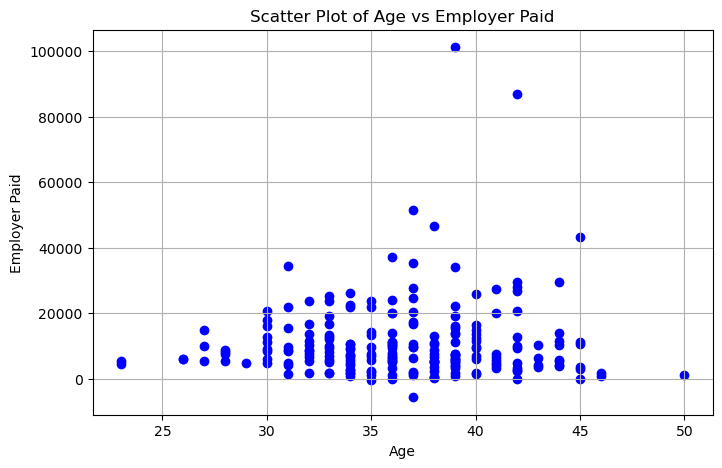

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(ivf1['Age'], ivf1['Med_Paid'], color='blue', marker='o')
plt.title('Scatter Plot of Age vs Employer Paid')
plt.xlabel('Age')
plt.ylabel('Employer Paid')
plt.grid(True)
plt.show()

In [113]:
ivf1[['Med_Days_Between', 'Med_Paid']].corr()

,Med_Days_Between,Med_Paid
Med_Days_Between,1.00,0.17
Med_Paid,0.17,1.00


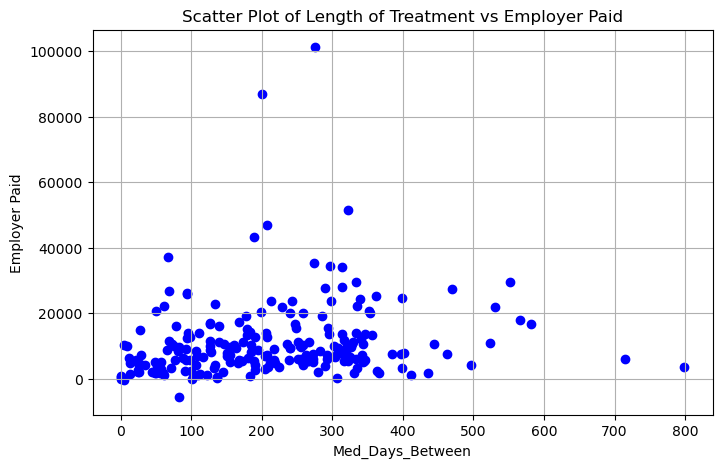

In [114]:
plt.figure(figsize=(8, 5))
plt.scatter(ivf1['Med_Days_Between'], ivf1['Med_Paid'], color='blue', marker='o')
plt.title('Scatter Plot of Length of Treatment vs Employer Paid')
plt.xlabel('Med_Days_Between')
plt.ylabel('Employer Paid')
plt.grid(True)
plt.show()

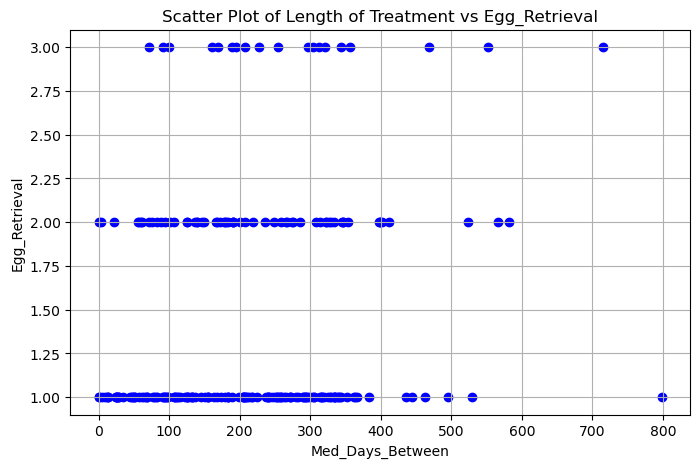

In [115]:
plt.figure(figsize=(8, 5))
plt.scatter(ivf1['Med_Days_Between'], ivf1['Egg_Retrieval'], color='blue', marker='o')
plt.title('Scatter Plot of Length of Treatment vs Egg_Retrieval')
plt.xlabel('Med_Days_Between')
plt.ylabel('Egg_Retrieval')
plt.grid(True)
plt.show()

In [117]:
#use original medical claims dataset and filter by 418 members set
uniq_members = ivf1['MEMBER_ID'].unique()
ivf2 = ivf[ivf['MEMBER_ID'].isin(uniq_members)]
ivf2

,MEMBER_ID,MEDICAL_CLAIM_ID,BILLING_PROVIDER_NAME,PAID_DATE,MEDICAL_PAID_AMOUNT,MEDICAL_ALLOWED_AMOUNT,PROCEDURE_CODE,PROCEDURE_DESC,SERVICE_DATE,EMPLOYER_NAME,SERVICING_PROVIDER_STATE,DIAGNOSIS_DESC_ICD10_1
9,mma-cf87590a85534ff48a38e4409cc33f1d,12406325.00,MEHMET YALCINKAYA TAMER MD,2024-01-01,18.16,18.16,82670,Estradiol (hormone) level (CPT 82670),2023-12-02,LIVE OAK BANCSHARE,NC,"Encounter for procreative management, unspecified"
24,mma-cf87590a85534ff48a38e4409cc33f1d,12406325.00,MEHMET YALCINKAYA TAMER MD,2024-01-01,12.04,12.04,83002,"Gonadotropin, luteinizing (reproductive hormon...",2023-12-02,LIVE OAK BANCSHARE,NC,"Encounter for procreative management, unspecified"
26,mma-d2a482eba09c4a69b6a48f0961c88a6d,3235229.00,BARBARA OSBORN HOPE M.D.,2024-01-01,93.48,133.48,58340,Introduction of saline or X-ray contrast mater...,2023-12-22,HUNTON ANDREWS KURTH,DC,Encounter for fertility testing
27,mma-d2a482eba09c4a69b6a48f0961c88a6d,3235229.00,BARBARA OSBORN HOPE M.D.,2024-01-01,5.65,5.65,81025,urine beta human chorionic gonadotrophin test ...,2023-12-22,HUNTON ANDREWS KURTH,DC,Encounter for fertility testing
29,mma-cf87590a85534ff48a38e4409cc33f1d,12406325.00,MEHMET YALCINKAYA TAMER MD,2024-01-01,12.08,12.08,83001,"Gonadotropin, follicle stimulating (reproducti...",2023-12-02,LIVE OAK BANCSHARE,NC,"Encounter for procreative management, unspecified"
...,...,...,...,...,...,...,...,...,...,...,...,...
100992,mma-691a5e5a73404adf9d7b71e7c2b8cd43,1800217.00,MARY JO DOUGHERTY PA - C,2025-01-31,0.00,0.00,76857,"Ultrasound, pelvic (nonobstetric), real time w...",2025-01-15,HAMPTON ROADS SANITATION DEPARTMENT,VA,"Female infertility, unspecified"
101003,mma-216b2d30dbe74a1d8a4a1e49974a512c,2872893.00,VIOS FERTILITY INSTITUTE CHICAGO,2025-01-31,16.06,16.06,84144,Progesterone (reproductive hormone) level (CPT...,2025-01-27,GLASSDOOR INC,ME,Encounter for assisted reproductive fertility ...
101006,mma-99326cd01b4a4f6db91e402c75035add,8915644.00,LAURA SMITH P M.D.,2025-01-31,0.00,275.00,58970,Abdominal or endoscopic aspiration of eggs fro...,2025-01-29,HOOKER FURNITURE,VA,Encounter for assisted reproductive fertility ...
101021,mma-c6dbf92121b744758180aecb05fe0928,11923669.00,UNILAB OF DADE INC,2025-01-31,14.46,20.65,84702,"Gonadotropin, chorionic (hCG); quantitative (C...",2025-01-27,BACARDI,FL,Encounter for assisted reproductive fertility ...


In [118]:
rx1
uniq_members = ivf1['MEMBER_ID'].unique()
rx2 = rx1[rx1['MEMBER_ID'].isin(uniq_members)]
rx2

,MEMBER_ID,RX_CLAIM_ID,PHARMACY_NAME,DRUG_NAME_PREFERRED,PAID_DATE,RX_PAID_AMOUNT,RX_ALLOWED_AMOUNT,RX_SCRIPT_COUNT,SERVICE_DATE
16,mma-7b6e5c47566e49ccb9e1485e6a6a1167,18249734.00,SANDSRX FRISCO,Menopur,2024-01-05,5102.90,5102.90,0.00,2023-12-28
23,mma-00cedc4e63a44cec83bd4661cc0d3978,1643305.00,CAREMARK SPECIALTY 48031,Ovidrel,2024-01-09,360.59,410.59,1.00,2024-01-09
35,mma-cf87590a85534ff48a38e4409cc33f1d,1132591.00,MANDELLS CLINICAL PHARMACY,Menopur,2024-01-15,2271.95,2271.95,10.00,2024-01-09
36,mma-3cdc1955ab724dcd943029b23277c1c7,10023361.00,AVELLA OF DEER VALLEY INC,Pregnyl,2024-01-15,0.00,0.00,0.00,2024-01-15
37,mma-cf87590a85534ff48a38e4409cc33f1d,15893521.00,MANDELLS CLINICAL PHARMACY,Pregnyl,2024-01-15,165.84,165.84,1.00,2024-01-09
...,...,...,...,...,...,...,...,...,...
5430,mma-5b272b21343743708d210915a72eb509,1517441.00,None,Menopur,2025-01-14,2045.39,2055.39,8.00,2025-01-14
5475,mma-5b272b21343743708d210915a72eb509,5052260.00,None,Pregnyl,2025-01-17,204.00,214.00,1.00,2025-01-17
5511,mma-5b272b21343743708d210915a72eb509,10053581.00,None,Menopur,2025-01-20,3843.85,3853.85,15.00,2025-01-20
5561,mma-227dc79dfb3f4a92ab8f7c7256146eb7,12171084.00,WALGREENS SPECIALTY PHARMACY #15438,Menopur,2025-01-24,3643.42,3703.42,16.00,2025-01-15


In [119]:
# Step 1: Aggregate by MEMBER_ID to get total medical paid amount per member
med_agg = ivf2.groupby('MEMBER_ID').agg(
    EMPLOYER_NAME=('EMPLOYER_NAME', 'first'),  # Retain the first occurrence of EMPLOYER_NAME
    MEDICAL_ALLOWED_AMOUNT=('MEDICAL_ALLOWED_AMOUNT', 'sum'),
    MEDICAL_PAID_AMOUNT=('MEDICAL_PAID_AMOUNT', 'sum')
).reset_index()
med_agg

,MEMBER_ID,EMPLOYER_NAME,MEDICAL_ALLOWED_AMOUNT,MEDICAL_PAID_AMOUNT
0,mma-0074b4b0405a4681a84a6a40fb58e4c4,GRIFOLS,15084.44,13644.66
1,mma-00cedc4e63a44cec83bd4661cc0d3978,COLLIERS ENGINEERING AND DESIGN,2082.46,1907.46
2,mma-01ff2109e19f4bb892a5de6f123803a2,"CORPAY, INC.",12175.01,10883.43
3,mma-021229d5337741629ee1d25ef74a9dd5,TOKIO MARINE NORTH AMERICA,7828.07,7695.29
4,mma-02e37592ee22437da58f6a17400a74fe,PARKLAND HEALTH & HOSPITAL SYSTEM,6780.46,6780.46
...,...,...,...,...
210,mma-f909d0d1bf85430594f027c933fa0a5e,PARKLAND HEALTH & HOSPITAL SYSTEM,7477.30,7477.30
211,mma-fba5559586804ff0a97ea991e474f0bb,LIVE OAK BANCSHARE,13475.93,13475.93
212,mma-febd81d4d7ae4e73b8af7199139b8e67,QUANTA SERVICES,2117.53,1404.17
213,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,QUANTA SERVICES,1963.71,1171.01


In [120]:
# Step 1: Aggregate by MEMBER_ID to get total RX paid amount per member
member_rx_agg = rx2.groupby('MEMBER_ID').agg(
    RX_ALLOWED_AMOUNT=('RX_ALLOWED_AMOUNT', 'sum'),
    RX_PAID_AMOUNT=('RX_PAID_AMOUNT', 'sum')
).reset_index()
member_rx_agg

,MEMBER_ID,RX_ALLOWED_AMOUNT,RX_PAID_AMOUNT
0,mma-0074b4b0405a4681a84a6a40fb58e4c4,5241.74,5056.74
1,mma-00cedc4e63a44cec83bd4661cc0d3978,674.24,609.24
2,mma-01ff2109e19f4bb892a5de6f123803a2,13297.33,13192.33
3,mma-021229d5337741629ee1d25ef74a9dd5,4850.08,4800.08
4,mma-02e37592ee22437da58f6a17400a74fe,150.00,5429.43
...,...,...,...
125,mma-f7eac770773440108081c9dee8b7cf99,9240.29,8762.82
126,mma-fba5559586804ff0a97ea991e474f0bb,165.64,165.64
127,mma-febd81d4d7ae4e73b8af7199139b8e67,3213.72,3113.72
128,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,3708.14,3608.14


In [121]:
member_agg = med_agg.merge(member_rx_agg, on='MEMBER_ID', how='left')
member_agg

,MEMBER_ID,EMPLOYER_NAME,MEDICAL_ALLOWED_AMOUNT,MEDICAL_PAID_AMOUNT,RX_ALLOWED_AMOUNT,RX_PAID_AMOUNT
0,mma-0074b4b0405a4681a84a6a40fb58e4c4,GRIFOLS,15084.44,13644.66,5241.74,5056.74
1,mma-00cedc4e63a44cec83bd4661cc0d3978,COLLIERS ENGINEERING AND DESIGN,2082.46,1907.46,674.24,609.24
2,mma-01ff2109e19f4bb892a5de6f123803a2,"CORPAY, INC.",12175.01,10883.43,13297.33,13192.33
3,mma-021229d5337741629ee1d25ef74a9dd5,TOKIO MARINE NORTH AMERICA,7828.07,7695.29,4850.08,4800.08
4,mma-02e37592ee22437da58f6a17400a74fe,PARKLAND HEALTH & HOSPITAL SYSTEM,6780.46,6780.46,150.00,5429.43
...,...,...,...,...,...,...
210,mma-f909d0d1bf85430594f027c933fa0a5e,PARKLAND HEALTH & HOSPITAL SYSTEM,7477.30,7477.30,NaN,NaN
211,mma-fba5559586804ff0a97ea991e474f0bb,LIVE OAK BANCSHARE,13475.93,13475.93,165.64,165.64
212,mma-febd81d4d7ae4e73b8af7199139b8e67,QUANTA SERVICES,2117.53,1404.17,3213.72,3113.72
213,mma-ff0ac00946ba4dd7a8ed9afe0f1d7258,QUANTA SERVICES,1963.71,1171.01,3708.14,3608.14


In [122]:
# Step 2: Group by SERVICE_PROVIDER_STATE to calculate sum and average of the aggregated medical paid amounts
employer_stats = member_agg.groupby('EMPLOYER_NAME').agg(
    Total_Medical_Allowed_Amount=('MEDICAL_ALLOWED_AMOUNT', 'sum'),
    Average_Medical_Allowed_Amount=('MEDICAL_ALLOWED_AMOUNT', 'mean'),
    Median_Medical_Allowed_Amount=('MEDICAL_ALLOWED_AMOUNT', 'median'),
    Total_Medical_Paid_Amount=('MEDICAL_PAID_AMOUNT', 'sum'),
    Average_Medical_Paid_Amount=('MEDICAL_PAID_AMOUNT', 'mean'),
    Median_Medical_Paid_Amount=('MEDICAL_PAID_AMOUNT', 'median'),
    Total_RX_Allowed_Amount=('RX_ALLOWED_AMOUNT', 'sum'),
    Average_RX_Allowed_Amount=('RX_ALLOWED_AMOUNT', 'mean'),
    Median_RX_Allowed_Amount=('RX_ALLOWED_AMOUNT', 'median'),
    Total_RX_Paid_Amount=('RX_PAID_AMOUNT', 'sum'),
    Average_RX_Paid_Amount=('RX_PAID_AMOUNT', 'mean'),
    Median_RX_Paid_Amount=('RX_PAID_AMOUNT', 'median'),
    Distinct_Member_Count=('MEMBER_ID','nunique')  # Count of distinct MEMBER_IDs
).reset_index()

# Sort columns
employer_stats.sort_values(by='Distinct_Member_Count', ascending=False)

,EMPLOYER_NAME,Total_Medical_Allowed_Amount,Average_Medical_Allowed_Amount,Median_Medical_Allowed_Amount,Total_Medical_Paid_Amount,Average_Medical_Paid_Amount,Median_Medical_Paid_Amount,Total_RX_Allowed_Amount,Average_RX_Allowed_Amount,Median_RX_Allowed_Amount,Total_RX_Paid_Amount,Average_RX_Paid_Amount,Median_RX_Paid_Amount,Distinct_Member_Count
41,PARKLAND HEALTH & HOSPITAL SYSTEM,274540.02,8856.13,8399.48,274540.02,8856.13,8399.48,1636.72,125.90,85.32,12862.32,989.41,234.79,31
44,QUANTA SERVICES,132053.32,6950.17,7244.99,106441.57,5602.19,5828.70,64233.51,3778.44,3490.28,54406.63,3200.39,3097.79,19
57,WAKEMED,158073.22,13172.77,11965.60,78306.62,6525.55,4668.78,24283.07,3469.01,4688.22,21331.64,3047.38,4142.98,12
30,INCYTE CORPORATION,157833.98,17537.11,14764.82,154237.88,17137.54,14162.35,89916.17,12845.17,1375.66,89661.17,12808.74,1340.66,9
54,VERISK ANALYTICS,83166.40,10395.80,8922.19,78911.72,9863.97,8432.49,32544.27,4649.18,3742.03,32134.27,4590.61,3712.03,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,HOOKER FURNITURE,3955.02,3955.02,3955.02,37.35,37.35,37.35,75.36,75.36,75.36,0.00,0.00,0.00,1
1,AMPLITY HEALTH,2618.54,2618.54,2618.54,1607.86,1607.86,1607.86,0.00,NaN,NaN,0.00,NaN,NaN,1
34,METROPOLIS,23176.38,23176.38,23176.38,22644.66,22644.66,22644.66,39.52,39.52,39.52,19.52,19.52,19.52,1
36,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,4877.48,4877.48,4877.48,3383.14,3383.14,3383.14,0.00,NaN,NaN,0.00,NaN,NaN,1


In [123]:
pop = """
WITH MemberAges AS (
   SELECT 
        EMPLOYER_NAME,
        MEMBER_ID,
        DATEDIFF(YEAR, CONVERT(DATE, BIRTH_YEAR_MO + '-01'), GETDATE()) - 
        CASE 
            WHEN MONTH(CONVERT(DATE, BIRTH_YEAR_MO + '-01')) > MONTH(GETDATE()) 
                 OR (MONTH(CONVERT(DATE, BIRTH_YEAR_MO + '-01')) = MONTH(GETDATE()) 
                     AND DAY(CONVERT(DATE, BIRTH_YEAR_MO + '-01')) > DAY(GETDATE())) 
            THEN 1 
            ELSE 0 
        END AS AGE
    FROM 
        ACTUARIAL_AH.DBO.SN_MEMBER
    WHERE
        MONTH_KEY = '12-01-24'
        AND GENDER = 0
        AND MEDICAL_ENROLLMENT_STATUS = 3 
)

SELECT 
    MA.EMPLOYER_NAME,
    COUNT(DISTINCT MA.MEMBER_ID) AS TOTAL_MEMBERS
FROM 
    MemberAges MA
JOIN ACTUARIAL_AH.DBO.SN_MEDICAL M ON MA.MEMBER_ID = M.MEMBER_ID
WHERE 
    AGE BETWEEN 15 AND 49
    AND PAID_DATE >= '2024-01-01'
GROUP BY 
    MA.EMPLOYER_NAME
ORDER BY 
    MA.EMPLOYER_NAME
"""
pop = pd.read_sql(pop, conn)

C:\Users\U1229773\AppData\Local\Temp\ipykernel_52308\4020801657.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop = pd.read_sql(pop, conn)


In [124]:
pop

,EMPLOYER_NAME,TOTAL_MEMBERS
0,ACCURIDE,231
1,ADMIRAL BEVERAGE CORPORATION,798
2,AESCULAPIAN MANAGEMENT COMPANY,212
3,AFNI INC,508
4,ALBEMARLE COUNTY & PUBLIC SCHOOLS,1856
...,...,...
292,"YAM MANAGEMENT, LLC",334
293,YEAR UP,460
294,ZENITH INSURANCE COMPANY,705
295,ZEP INC,257


In [125]:
pop_stats = employer_stats.merge(pop, on='EMPLOYER_NAME')
pop_stats

,EMPLOYER_NAME,Total_Medical_Allowed_Amount,Average_Medical_Allowed_Amount,Median_Medical_Allowed_Amount,Total_Medical_Paid_Amount,Average_Medical_Paid_Amount,Median_Medical_Paid_Amount,Total_RX_Allowed_Amount,Average_RX_Allowed_Amount,Median_RX_Allowed_Amount,Total_RX_Paid_Amount,Average_RX_Paid_Amount,Median_RX_Paid_Amount,Distinct_Member_Count,TOTAL_MEMBERS
0,ALPLA INC,17922.11,8961.06,8961.06,10885.10,5442.55,5442.55,0.00,NaN,NaN,0.00,NaN,NaN,2,392
1,AMPLITY HEALTH,2618.54,2618.54,2618.54,1607.86,1607.86,1607.86,0.00,NaN,NaN,0.00,NaN,NaN,1,300
2,BACARDI,19669.01,19669.01,19669.01,13563.76,13563.76,13563.76,0.00,NaN,NaN,0.00,NaN,NaN,1,723
3,BADGER METER INC,16621.02,16621.02,16621.02,12731.78,12731.78,12731.78,0.00,NaN,NaN,0.00,NaN,NaN,1,332
4,BANKERS HEALTHCARE,133776.43,26755.29,17000.00,115586.38,23117.28,14961.41,21098.69,10549.35,10549.35,17971.61,8985.81,8985.81,5,586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WESTAT,8378.69,4189.35,4189.35,7688.64,3844.32,3844.32,9415.67,4707.84,4707.84,9115.67,4557.84,4557.84,2,431
60,WOODWARD ACADEMY,15230.32,15230.32,15230.32,13865.10,13865.10,13865.10,0.00,NaN,NaN,0.00,NaN,NaN,1,260
61,WORLDSTRIDES,1812.42,1812.42,1812.42,980.22,980.22,980.22,76.33,76.33,76.33,66.33,66.33,66.33,1,430
62,YEAR UP,22871.66,7623.89,7507.56,19365.56,6455.19,5629.48,9348.13,4674.07,4674.07,9198.13,4599.07,4599.07,3,460


In [126]:
pop_stats['PER_1K'] = (pop_stats['Distinct_Member_Count'] / pop_stats['TOTAL_MEMBERS']) * 1000
pop_stats.sort_values(by='PER_1K', ascending=False)

,EMPLOYER_NAME,Total_Medical_Allowed_Amount,Average_Medical_Allowed_Amount,Median_Medical_Allowed_Amount,Total_Medical_Paid_Amount,Average_Medical_Paid_Amount,Median_Medical_Paid_Amount,Total_RX_Allowed_Amount,Average_RX_Allowed_Amount,Median_RX_Allowed_Amount,Total_RX_Paid_Amount,Average_RX_Paid_Amount,Median_RX_Paid_Amount,Distinct_Member_Count,TOTAL_MEMBERS,PER_1K
38,NATIONAL GEOGRAPHIC,81349.88,20337.47,18569.64,77679.58,19419.90,17409.64,14881.28,14881.28,14881.28,14831.28,14831.28,14831.28,4,292,13.70
45,RICHLINE GROUP,22990.52,11495.26,11495.26,22750.52,11375.26,11375.26,3298.08,3298.08,3298.08,2998.08,2998.08,2998.08,2,157,12.74
21,FELICIAN UNIVERSITY,14023.52,14023.52,14023.52,13923.52,13923.52,13923.52,0.00,NaN,NaN,0.00,NaN,NaN,1,79,12.66
50,STOCKX,39180.44,13060.15,11880.81,35678.44,11892.81,10334.02,24312.29,8104.10,8926.63,23952.29,7984.10,8826.63,3,271,11.07
56,WAFRA,15147.17,15147.17,15147.17,11498.06,11498.06,11498.06,0.00,NaN,NaN,0.00,NaN,NaN,1,101,9.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,MCCORMICK,5815.73,5815.73,5815.73,4483.90,4483.90,4483.90,4677.54,4677.54,4677.54,4577.54,4577.54,4577.54,1,1815,0.55
48,SHI INTERNATIONAL CORP,8497.54,8497.54,8497.54,6111.81,6111.81,6111.81,0.00,NaN,NaN,0.00,NaN,NaN,1,2091,0.48
11,CHOP,-6178.04,-1544.51,8.17,-4868.27,-1217.07,-10.16,0.00,NaN,NaN,0.00,NaN,NaN,4,10528,0.38
36,MISSOURI CHAMBER FEDERATION BENEFIT PLAN TRUST,4877.48,4877.48,4877.48,3383.14,3383.14,3383.14,0.00,NaN,NaN,0.00,NaN,NaN,1,9676,0.10


In [127]:
ivf_stats_costs = pop_stats.to_csv('ivf_stats_costs.csv', index=False)